In [2]:
import pandas as pd
# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
# figsize(15, 5)
pd.set_option('display.max_colwidth', -1) # show comments in full length

In [3]:
comments = pd.read_csv('./guardian-100000/sorted_comments-100000.csv')
comments.upvotes = pd.to_numeric(comments.upvotes, errors='coerce')
comments.timestamp = pd.to_datetime(comments.timestamp, errors='coerce')

In [4]:
comments[:100]

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
0,1,1,14606180,"So you are saying that the demonisation of feminists is their own fault? It's not my fault. But, to your point, I don't care whether the person who shows up to carry my father out of his burning house is a woman or a man as long as that person is physically up to the job. I would be very surprised if the feminist movement disagreed with that position, it being fundamental to the idea of equality. who no matter what they say will never believe that all men are rapists That viewpoint is held by a very small number of people - no-one was suggesting it here. ...and that i only want ot be with my children because I am too stupid to realised that i have been conditioned to do so. What I actually said was, if you accept that women want to be with their children more than men do, in general, that it is either a result of conditioning or biology. Neither of these positions is offensive to you; neither entails calling you stupid. People will demonise anything that appears to be holding extreme or unreasonable views... Call all men rapist and they will. Feminists are not demonised for calling men rapists. They are demonised for holding perfectly reasonable views. Although you may not agree with them, there is nothing unreasonable about saying that women and man should be treated equally. Men are criticised for not conforming to what is considered to be the traditional role for a man, and they daren't ever mention 'mens rights' . How that any different? It is not different. Why should anyone have to conform to other peoples' idea of what they should be like? I respect your position about being a mother and not wanting to pursue a career. Why should you not respect the position that a woman can have children and pursue a career? Why should you not respect the position that a man can be the primary caregiver just as easily as a woman can? What caring roles are women being forced into that they don't want to do, be specific sweeping generalisations are very evasive. Again, you are misrepresenting what I said. Nobody is forced into a caring role. My issue is that you think women should accept that they are suited to caring roles and not to positions in influential spheres, e.g. law, banking, political office, neurosurgery, NASA etc. Women are being criticised by people like you for wanting only what they are entitled to. That is my problem.",NaN,2012-02-11 12:49:42,0.0
1,1,1,14605967,"So you are explicitly saying that it is not ok for men to raise children and for women to perform top jobs, or for women to have children and have, for example, a nanny, spending as much time with their children as the father does? Attitudes like yours are the reason people starting burning their bras to start with.",14605336,2012-02-11 12:29:29,0.0
2,1,1,14605172,"So we have given up on the reasoned debate then? I do not talk about children like I am talking about doing the dishes. However it is entirely unreasonable to suggest that, because as a woman I may or may not be wired to want to care for my children, I should give up the notion of having a career as well. That is like something out of the dark ages. I honestly thought we had come further than that and there was a degree of consensus around things like maternity leave/pay. Clearly I was wrong. That does not mean you answered any of my questions by the way.",14605044,2012-02-11 11:15:06,0.0
3,1,1,14605013,"Because some of the points that they raise are as a result of their own actions and they refuse to take responsibility for it. Such as what? I don't think that I, as a woman - whether or not you could call me a feminist - could possibly be influential enough for the pay gap to be a result of my actions. I don't think the objectification of woman can possibly be a result of my actions. I don't think my biological make-up can possibly be a result of my actions. You need to be more specific, what kind of job

In [5]:
comments['comment_text']

0        So you are saying that the demonisation of feminists is their own fault? It's not my fault. But, to your point, I don't care whether the person who shows up to carry my father out of his burning house is a woman or a man as long as that person is physically up to the job. I would be very surprised if the feminist movement disagreed with that position, it being fundamental to the idea of equality. who no matter what they say will never believe that all men are rapists That viewpoint is held by a very small number of people - no-one was suggesting it here. ...and that i only want ot be with my children because I am too stupid to realised that i have been conditioned to do so. What I actually said was, if you accept that women want to be with their children more than men do, in general, that it is either a result of conditioning or biology. Neither of these positions is offensive to you; neither entails calling you stupid. People will demonise anything that appears to be holding 

In [6]:
high_upvotes = comments['upvotes'] > 500
comments[high_upvotes]

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
72045,1132,23585,105278342,"Charming, excellently put, and perfectly said. No-one twists the knife quite as exquisitely as you :). Thanks, Marina!",NaN,2017-09-15 16:39:47,538.0
83882,1190,1765,98523904,Yes. He owns the Tory Party.,NaN,2017-05-14 09:33:25,1005.0
84385,1190,27838,98525391,"Why ask a question when the answer is well known? Dacre is an enemy of the people and an enemy of the UK. And here is the thing, he purports this to be the case with every headline! He is pimp to Theresa May and all conservatives, what in God's name is there not to see?",NaN,2017-05-14 09:57:36,537.0
84388,1190,27840,98523451,Enemy of the people,NaN,2017-05-14 09:26:45,1389.0
84418,1190,2823,98525574,"Thanks to Tim Adams for slithering around in Mail bile for so long and emerge able to write this. What an odious person Dacre is! I didn't know, until now, that May has a Mail plant inside her advisory team, Jack Slack...but of course we never see him in public, he's never publicly questioned. It's all part of 'The Great British Brexit robbery' described in last week's Observer.",NaN,2017-05-14 10:01:41,638.0
90052,1221,29660,94981503,Those two are made for each other: a neo-Fascist ratbag and a venal opportunist.,NaN,2017-03-15 21:19:57,629.0
90131,1222,21810,94816683,"Before the over-hyped furore I had assumed it was a nanny. In the few seconds in which the incident occurred I imagine I subconsciously reckoned that an American academic in South Korea was statistically more likely to have a local nanny than a local wife. I was wrong in my assumption, but it really doesn't indicate any racism on my part.",94815494,2017-03-13 17:23:14,517.0
90198,1222,22955,94815573,"If you saw a nanny in this BBC interview, what does that say about you? That the apparent panic with which she dealt with the situation seemed more servile than wifely I think.",NaN,2017-03-13 17:08:12,1205.0
90359,1222,2898,94814849,"[ In a world noisy with news of terrible atrocities, why does an assumption about a woman in a comedy viral video matter? ] It doesn't. [ Unconscious bias or outright racist assumptions have real consequences. If we don’t consider certain people to be as human as we are, their happiness or wellbeing is less important to preserve. We get to treat them how we like or we stand by as they are treated badly. ] Hang on: people assumed she was a nanny. Are nannies less human? This is silly.",NaN,2017-03-13 16:58:35,963.0
90648,1222,29863,94817900,"This is the most insane bit. Apparently, to assume she is the nanny means she is less than human? How does that follow?",94814849,2017-03-13 17:38:13,522.0


In [7]:
import altair as alt


# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

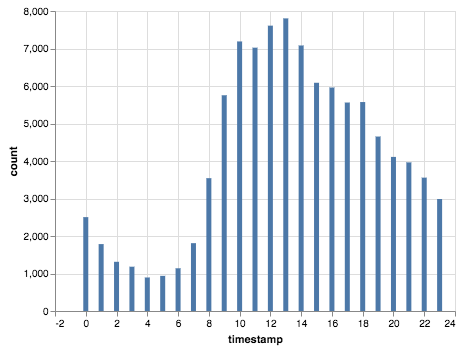

In [8]:
comments_2 = comments[comments['upvotes'] > -1]
comments_2 = comments_2[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

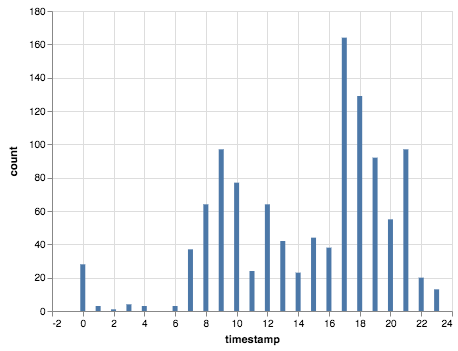

In [9]:
comments_2 = comments[comments['upvotes'] > 50]
comments_2 = comments_2[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

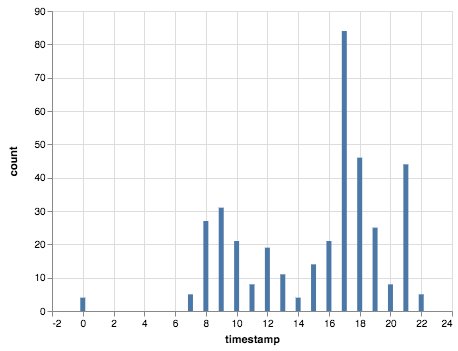

In [10]:
comments_2 = comments[comments['upvotes'] > 100]
comments_2 = comments_2[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

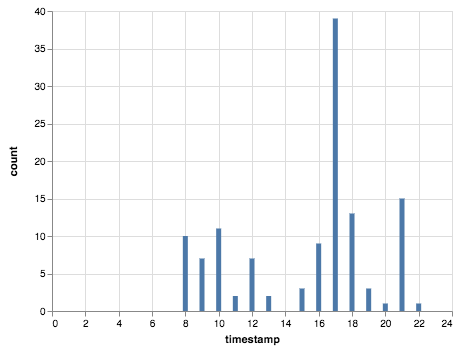

In [11]:
comments_2 = comments[comments['upvotes'] > 200]
comments_2 = comments_2[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

In [12]:
comments_2 = comments[comments['upvotes'] > 100]

comments_2['article_id'].value_counts()

1190    54
1241    38
1222    37
1221    36
1120    19
1132    19
1229    19
1110    15
1225    15
1170    13
1223    10
1194    9 
1248    8 
1244    7 
1218    6 
1175    5 
115     5 
547     5 
514     5 
157     4 
1228    4 
466     3 
1239    3 
1243    3 
1108    3 
1159    3 
1212    2 
1160    2 
84      2 
285     2 
486     2 
1161    2 
1167    2 
1230    2 
1164    1 
1246    1 
1254    1 
1121    1 
1176    1 
354     1 
1107    1 
565     1 
559     1 
458     1 
31      1 
526     1 
1149    1 
Name: article_id, dtype: int64

In [13]:
comments[comments["article_id"] == 1190]

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
83872,1190,10731,98544117,"The wrap dress and styling thing I have noticed - I know of a couple of women who have been profiled in the Mail, and the outfits and style are so unlike their usual self, I realised that there must be a standard Mail 'look' they are being shoehorned into. It is very peculiar.",NaN,2017-05-14 16:21:04,11.0
83873,1190,11632,98549469,"How much the right wing media has had to do with Brexit and Trump is very difficult to assess. Fear mongering, race baiting, slandering educated liberally inclined people, attacking trades unions, demanding lower taxes go way, way back, in fact right back into the 19th century. Liberals have long complained of it. The US and UK, for my whole lifetime which is now coming to its inglorious close, have always had a very active gutter press &amp; colourful quasi-fascist personalities making disproportionately loud noises. Do they matter? How can we tell?",NaN,2017-05-14 18:20:30,4.0
83874,1190,118,98549417,Dacre is simply an odious creature who has been allowed to accrue an unhealthy power base from which to spout his bile and venom unchallenged.,NaN,2017-05-14 18:19:22,19.0
83875,1190,13640,98548439,He owns the Blairites as well. They bow before him as if his incoherent shit-slinging and fascist lies were some kind of coherent ideology.,98523904,2017-05-14 17:58:33,400.0
83876,1190,15014,98548892,I wonder how many people have died because of the hatred and vitriol his newspaper spews into the public domain?,98548304,2017-05-14 18:08:01,17.0
83877,1190,15551,98550895,That editor's chair photo's given me the fear.,NaN,2017-05-14 18:54:17,3.0
83878,1190,1765,98527358,"A free press where that free press accuses judges of being enemies of the people, and the government absolutely goes along with that? That is an extremely unhealthy relationship between one newspaper and the ruling party. And unhealthy is a very mild word to describe it.",98526872,2017-05-14 10:33:22,178.0
83879,1190,1765,98526809,"I'm sure my gran had many copies of it in the 1950s. It was torn into squares and hung on a string in the privy. See, there used to be a good use for it?",98526415,2017-05-14 10:22:08,28.0
83880,1190,1765,98526705,"If you want to influence people's political views, first of all you've got to attract them to other stuff. Who do they wish to attract ........... simply look down the right-hand column of their home page, and all is revealed (in more senses than one) ..... http://www.dailymail.co.uk/home/index.html",98526066,2017-05-14 10:20:26,42.0
83881,1190,1765,98525877,"Dacre is an extremely rich journalist. So is Murdoch and his henchmen. The BBC and ITV are stuffed full of extremely/obscenely well paid administrators and journalists and simple news readers on vast sums. We are not going to get what is best for ordinary people from any of these. The slightest hint of the overpaid actually paying over 45% income tax (or indeed at all), and they are going to fight like a wounded tiger against the best interests of the public using every means at their disposal, of which they have ample supply. They'll use the idiot-stand parroting of nonsensical soundbytes, the lies of politicians (the one this morning about housing for all being the usual baseless bollocks that has been fed to mugs for the past 40 years) and plenty of sex sells sleaze to wind in the punters like an angler winds in a small trout. And all the time, NO-ONE, especially the government, running ads for getting people to register to vote, nor of voting. I was even told by a friend who is a clerk to a Parish Council that everyone in her area has received their voting cards in a Tory run area. If the voters turf up to where they've been told to, they'll find an old couple trying to turn them away from their semi. If you want cock-ups beyond your worst nightmares, vote Tory.",NaN,2017-05-14 10:06:55,375.0


In [14]:
comments[comments["article_id"] == 1241]

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
95811,1241,10145,92888156,"[ feature writer Guy Adams. Adams has posted more than 20,000 tweets to his more than 14,000 followers. ] ha ha...awww, he's trying so hard to be noticed...but it's not really happening.",NaN,2017-02-09 19:07:58,10.0
95812,1241,10556,92887448,No reason but it's not available to the average employee who has their tax taken by paye before they even see it. And wouldn't contradict the claim he used a complex scheme to minimise what he pays.,92886864,2017-02-09 18:54:25,3.0
95813,1241,10556,92885868,The Mail is obviously persecuting Lineker for his views. But paying your taxes in full doesn't necessarily exclude legal minimisation schemes.,NaN,2017-02-09 18:24:57,7.0
95814,1241,10937,92887636,I really despise the Daily Mail.,NaN,2017-02-09 18:58:07,14.0
95815,1241,11204,92889457,I love the fact that the this Guardian piece makes no comment on the truth or otherwise of the mail's claims about Gary's tax affairs. I'd be amazed if GL isn't making use of the same kind of perfectly legal but morally dubious tax arrangements that the Guardian routinely (rightly) complains about. The fact that this article is purely of the look how horrible the Mail is being to lovely Gary variety makes it click-bait pure and simple (and it works well as 762 of us and counting have commented.,NaN,2017-02-09 19:33:16,49.0
95816,1241,11241,92888302,[ You are niece if you think any footballer past or present has paid all their tax due. ] Niece? As in my brother/sister's daughter?,92887452,2017-02-09 19:10:56,1.0
95817,1241,11241,92887984,"Personally, I hope that Lineker (note capital L and correct spelling - the name's in the article) sues the arse off the Daily Mail for libel when it's proved that this story is merely malicious bullshit.",92887696,2017-02-09 19:04:30,6.0
95818,1241,11585,92881764,Looks like Adams has put through his own goal. Let's watch it again.,NaN,2017-02-09 17:14:18,6.0
95819,1241,12130,92887661,"Sure. Personally i think these film partnerships are pretty dodgy. But in my book any moral negatives attaching to that are more than cancelled out for by his courage and decency standing up to the hysterical hatred and xenophobia of the likes of the Daily Hate. And many times over. More power to him. On the other side I'm struggling to think what offsets the Daily Hate's relentless propagation of bigotry, hatred, racism, and intimidation of all who disagree with hypocrite Dacre's (he of the EU funded Scottish lodge) sociopathic world view. And no, Monty Don's gardening column does not restore the balance.",92887319,2017-02-09 18:58:36,5.0
95820,1241,12130,92885782,"I hope Melania wins her suit against the Mail - or more accurately the Mail loses. Although I can't stand the Trumps a win won't make much financial difference to them, but with luck will cripple the Mail.",NaN,2017-02-09 18:23:08,6.0


In [15]:
comments[comments["article_id"] == 1241].sort_values(by=['timestamp'])

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
96178,1241,31437,92880815,"My 93 year Nan gets the Daily Mail delivered. Every time we stay there, I go through the same routine of firstly, convincing myself it can't be all that bad, to (all to quickly) shouting at it and trying not to swear in front of the kids.",NaN,2017-02-09 16:58:20,895.0
95870,1241,22282,92880926,"I guess it's time for the Mail to put up or shut up ( if only ) You must be doing something right, Gary, if you've upset that shitty rag.",NaN,2017-02-09 17:00:03,1393.0
96567,1241,31631,92881080,The writers are the daily mail are ordinary people who need to take a long hard look at themselves in the reflection of the windows on the way down.,NaN,2017-02-09 17:02:59,321.0
96566,1241,31630,92881097,Linekar tell them the full message what i said.,NaN,2017-02-09 17:03:17,2.0
96565,1241,31629,92881123,He's a successor to David Attenborough as 'National Treasure',NaN,2017-02-09 17:03:57,165.0
96588,1241,5745,92881139,bigotˈbɪɡət/nouna person who is intolerant towards those holding different opinions.,NaN,2017-02-09 17:04:09,16.0
95943,1241,24106,92881373,We know who the real tax cheats and hypocrites are.... and they've never scored in the World Cup....,NaN,2017-02-09 17:08:21,309.0
96532,1241,31599,92881390,Who would of thought it. New Labour leader?,92881123,2017-02-09 17:08:31,18.0
95842,1241,17071,92881403,Are you calling the Daily Mail a bigot?,92881139,2017-02-09 17:08:43,142.0
96531,1241,31599,92881428,I couldn't live myself.,92881080,2017-02-09 17:09:14,17.0


In [16]:
print(comments[comments["article_id"] == 1241].sort_values(by=['upvotes']).to_string())

       article_id  author_id comment_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [22]:
a_c = pd.DataFrame(comments.article_id.value_counts().reset_index())
a_c.columns = ['article_id', 'cou']

merged = pd.merge(comments, a_c, on='article_id')
# print(merged)


merged['ratio'] = merged['upvotes'] / merged['cou']

# merged = merged[['upvotes']].div(merged.cou, axis='index')

merged = merged[merged['ratio'] > 0.4]

merged

# print(merged)

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes,cou,ratio
329,6,214,14521396,"Couldn't agree more, Hadley. Self-confidence is the most sexy attribute a woman can possess. My girlfriend and I find the whole Valentine's thing gloriously daft and immensely enjoyable, and a great excuse to dress up as a call girl. Just exactly which one of us dresses up as a call girl is none of your damn business. . . .",NaN,2012-02-06 16:36:17,30.0,59,0.508475
1772,20,869,14338497,"Do say: fundraise so that strays can be neutered Don't say (after a pint or two at your local) yes, here's £350 for that adorable Staffie pup",NaN,2012-01-26 09:49:16,6.0,8,0.750000
1773,20,870,14338092,"Bad news indeed but I'm afraid I need to point out a couple of errors, one small, one glaring: It's Dandy Dinmont, not dimont. There's no such dog as a Kelly Blue; it's a Kerry Blue and it's not British, it's Irish. Speaking of which, the wonderful Irish water spaniel is also in deep doo-doo. If I had the various resources needed to do so, I'd love to breed all these wonderful dogs myself just to keep them going. However, I'd also need the resources to take on one rescue dog for every pedigree as I'd feel bad if I didn't. It'd be a mammoth task but if I ever get a publisher for that potentially best-selling children's book, that's then turned into a film, accompanied by loads of merchandise, followed by more books and films of the same that make me filthy stinking rich in a JK Rowling stylee... that's the project for me. Ah, dreams; where would we be without our lovely, improbable dreams? :0)",NaN,2012-01-26 09:20:08,4.0,8,0.500000
2106,27,1047,14256535,"Brussels sprouts are supposed to be a tad bitter - can we please have an end to this constant campaign to try to make them into something they're not? If you don't like the taste, just don't eat the things - it's not rocket science - and I've never seen anyone get the urge to bugger about with chicory just because it's bitter. There is room in the taste palette for bitterness, so leave sprouts alone.",NaN,2012-01-21 10:04:14,3.0,4,0.750000
3147,33,1384,14190384,"My brother, who had testicular cancer at the age of 30 and received a silicone prosthesis, could enlighten you as to the purpose of testicular implants if you continue to be baffled.",NaN,2012-01-17 13:41:04,9.0,19,0.473684
3302,36,1449,14140763,"this new column has one meat and one veg, today being the exception, for which you'll get double veg next week as yotam explained. there are hundreds of exciting vegetarian ottolenghi recipes in the archive on here. i personally don't see the reason why you are complaining? anyway, enjoy :-)",NaN,2012-01-14 11:47:29,3.0,7,0.428571
3344,38,1474,14113465,"Why on earth do you refer to him as your boyfriend? He isn't. He's your (platonic) friend. He can still be your friend once you find a boyfriend. but I wouldn't waste five minutes on his sexual problem and I certainly wouldn't demean myself by trying to persuade him to have sex by masturbating him. But then I'm not interested in having sex with anyone I fancy who's unattached if they're not equally delighted and enthusiastic about the prospect of having sex with me, Cut your losses and move on.",NaN,2012-01-12 18:50:34,34.0,83,0.409639
3367,38,1495,14114101,"If he sees women as mothers/cousins/friends as opposed to sexual partners (in the fullest sense of the term), then perhaps he is gay? Just a thought.",NaN,2012-01-12 19:35:25,34.0,83,0.409639
3431,39,1520,14100464,"Piers Morgan is not a cock. If he was, he'd be useful.",NaN,2012-01-12 07:16:35,23.0,34,0.676471
3865,43,1739,14050690,"I always wondered why this brand was so hard to find in the UK. Last year after reading some good reviews from online bloggers I turned to ebay to try and track some down, and I was most disappointed when my prized bid arrived and, inevitably, turned out to be a pretty poor counterfeit! After reading this I am very pleased that I not only managed to avo

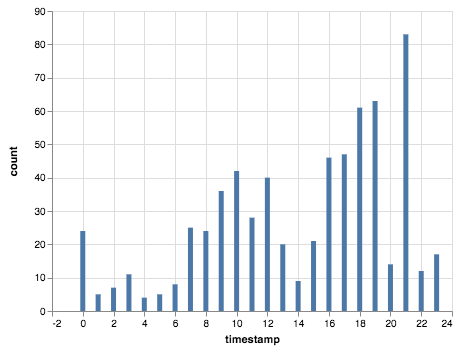

In [23]:
# comments_2 = comments[comments['upvotes'] > 200]
comments_2 = merged[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

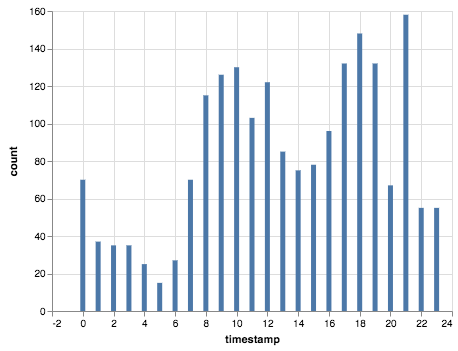

In [24]:
a_c = pd.DataFrame(comments.article_id.value_counts().reset_index())
a_c.columns = ['article_id', 'cou']

merged = pd.merge(comments, a_c, on='article_id')
# print(merged)


merged['ratio'] = merged['upvotes'] / merged['cou']

# merged = merged[['upvotes']].div(merged.cou, axis='index')

merged = merged[merged['ratio'] > 0.2]

comments_2 = merged[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

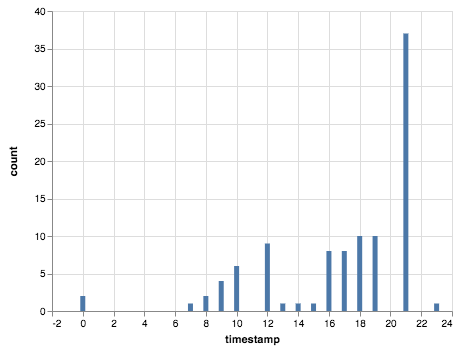

In [28]:
a_c = pd.DataFrame(comments.article_id.value_counts().reset_index())
a_c.columns = ['article_id', 'cou']

merged = pd.merge(comments, a_c, on='article_id')
# print(merged)


merged['ratio'] = merged['upvotes'] / merged['cou']

# merged = merged[['upvotes']].div(merged.cou, axis='index')

merged = merged[merged['ratio'] > 1]

comments_2 = merged[['timestamp']].copy()

comments_2.set_index('timestamp', drop=False, inplace=True)
d = comments_2.groupby(comments_2.timestamp.index.hour).count()
d.set_axis(['count'], axis=1, inplace=True)

d = d.reset_index()

alt.Chart(d).mark_bar().encode(x='timestamp',y='count')

In [31]:
merged[:20]

,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes,cou,ratio
6508,77,228,13681623,"Interesting, if not very surprising. Wilful ignorance is one of the greatest dangers faced by human society in the 21st century, and when combined with a needy clinging to 'strong', authoritarian governments, leads to utter disaster. We saw this in the 1930s and 1940s, as Europeans chose to embrace ludicrous ideologies - in this case, fantasies of ethnic and national superiority - and the right-wing governments that peddled them. Despite these potent lessons, the same thing seems to be happening all over again. People are terrified - mostly because of what their governments are doing to them (damaging ordinary people in order to keep the rich in clover), but instead of seeing that for what it is, and holding the governments to account, they submissively accept all the nonsense promulgated by the government. People who constantly act against their own interests in preference to thinking for themselves are horrifying - from poor Americans opposing universal healthcare to the nutter Brits who think that the public sector, people on benefits and single mothers are collectively responsible for a global economic meltdown. And the general refusal to act on the overwhelming scientific evidence that we're at the very brink of climate disaster - just because the govt doesn't take it seriously - is shocking.",NaN,2011-12-10 19:49:50,9.0,5,1.800000
17647,241,5400,11775361,"Whenever my finger wavers over the 'play' button on these 'How to dress' features, I am brought to a state of near unbearable excitement as I think... 'Yay! I can see a lady. She looks pretty stylish. She's going to tell us about how to combine this featured item with a bevvy of other pieces. This will create a hitherto unthought-of look, that we, the fashion ignoratti, have been missing out on. This is because we feel a bit overwhelmed by the sheer volume of what is on offer, each time we go into Zara/Topshop/M &amp; S. Praise be!' Or...' This lady is going to tell us some really interesting things about wearing this featured item. Something that will then educate us and may just stop us making a HUGE fashion faux pas. Something along the lines of: 'if you are a bit short-arsed and have big boobs, wearing this short, waterfall jacket is going to make you look like a total mono-boobed, chubster. Avoid please.' But then I remember that if I do press 'play', all I will see is this stylish lady having a whale of a time, prancing around getting her picture taken, fondling a few pieces on a hanger that we have already seen in the shops, before, swoon, telling us where we can get it. Revelatory? Sadly... no.",NaN,2011-07-30 08:55:56,3.0,2,1.500000
19955,285,5990,11237399,Vain and shallow people treating other vain and shallow people in a vain and shallow way.,NaN,2011-06-20 00:13:48,131.0,125,1.048000
20023,285,8176,11237395,"Goodness, it's like reading something from The Onion.",NaN,2011-06-20 00:13:34,169.0,125,1.352000
23337,336,8545,10587347,Well done....that time is fantastic!! think of the time you will be able to do without the stitch and the altitude!! that will be one crazy fast time!!!,NaN,2011-05-03 12:38:32,8.0,7,1.142857
23966,352,9449,10394592,"No mention here of Lee Miller (1907–1977). Could it be that photographers and photojournalists can still be considered to be somehow merely technician-tradesman. But she does get her rightful place in the Oxford DNB: it was for her features in Vogue that she was best known, particularly after D­day when, as an accredited war correspondent, she followed the advance of the American army across Europe. During the liberation of Paris she photographed Picasso and many other figures of the art world, all friends from before the war. Contrary to army regulations she photographed combat on many occasions, being present at the siege of St Malo, and during the bitter fighting in the Vosges Mountains in the winter of 194